# Crime Analysis and prediction

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [54]:
import mysql.connector


connection = mysql.connector.connect(
    host='127.0.0.1',        
    user='root',    
    password='root',
    database='crime_analysis_db'    
)


query = "SELECT * FROM cleveland_street_2025_06;"
df = pd.read_sql(query, connection)


connection.close()


df.head()

Crime_ID    Month  \
0  d3ff12e7b608f4de5893b306a19a5bd99f89c27b535949...  2025-06   
1                   FD2F8F1C1FF5C8311DC31D939B6A6768  2025-06   
2                   0E9B131037233DA6E173DAB9589E2B22  2025-06   
3                   06912C42891A0F88A44F8E0E1A5B7E34  2025-06   
4  726c6c13686c097c13b8e0d9817482cd3de7a75cc7b094...  2025-06   

        Reported_by      Falls_within  Longitude   Latitude  \
0  Cleveland Police  Cleveland Police  -1.318044  54.707863   
1  Cleveland Police  Cleveland Police  -1.129457  54.496035   
2  Cleveland Police  Cleveland Police  -1.311583  54.472215   
3  Cleveland Police  Cleveland Police  -1.311583  54.472215   
4  Cleveland Police  Cleveland Police  -1.311583  54.472215   

                     Location  LSOA_code           LSOA_name  \
0     On or near Parking Area  E01020772  County Durham 043A   
1    On or near Orchard Close  E01027598      Hambleton 002A   
2  On or near Park/Open Space  E01027617      Hambleton 003D   
3  On or near Park/Open Space  E01027617      Hambleton 003D   
4  On or near Park/Open Space  E01027617      Hambleton 003D   

                     Crime_type        Last_outcome_category  
0                   Other crime          Under investigation  
1         Anti-social behaviour                      Unknown  
2         Anti-social behaviour                      Unknown  
3         Anti-social behaviour                      Unknown  
4  Violence and sexual offences  Unable to prosecute suspect

In [30]:
df.tail()

Crime_ID    Month  \
7802                   F4B6FCB339EE82C2137F1CEFE03E8E59  2025-06   
7803                   E9224D45C16107FC75E281F5142D1CD9  2025-06   
7804                   F24F5C8421D989737A524CCE7756F3DB  2025-06   
7805  9756a378e49ff3b4351f714d56ad461b03c92db620c2c0...  2025-06   
7806  9f2dd80a9cdb78ea3872c747362f16f59697ee893dbf09...  2025-06   

           Reported_by      Falls_within  Longitude   Latitude  \
7802  Cleveland Police  Cleveland Police  -1.312340  54.507144   
7803  Cleveland Police  Cleveland Police  -1.314661  54.508729   
7804  Cleveland Police  Cleveland Police  -1.313932  54.507072   
7805  Cleveland Police  Cleveland Police  -1.316957  54.508104   
7806  Cleveland Police  Cleveland Police  -1.321483  54.508975   

                          Location  LSOA_code              LSOA_name  \
7802       On or near Exford Close  E01012234  Stockton-on-Tees 028E   
7803  On or near Sober Hall Avenue  E01012234  Stockton-on-Tees 028E   
7804    On or near Woolcotts Close  E01012234  Stockton-on-Tees 028E   
7805     On or near Foreland Point  E01012234  Stockton-on-Tees 028E   
7806   On or near Whitchurch Close  E01012234  Stockton-on-Tees 028E   

                     Crime_type                          Last_outcome_category  
7802      Anti-social behaviour                                        Unknown  
7803      Anti-social behaviour                                        Unknown  
7804      Anti-social behaviour                                        Unknown  
7805              Bicycle theft  Investigation complete; no suspect identified  
7806  Criminal damage and arson  Investigation complete; no suspect identified

In [31]:
df.isnull().sum()

Crime_ID                 0
Month                    0
Reported_by              0
Falls_within             0
Longitude                0
Latitude                 0
Location                 0
LSOA_code                0
LSOA_name                0
Crime_type               0
Last_outcome_category    0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7807 entries, 0 to 7806
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime_ID               7807 non-null   object 
 1   Month                  7807 non-null   object 
 2   Reported_by            7807 non-null   object 
 3   Falls_within           7807 non-null   object 
 4   Longitude              7807 non-null   float64
 5   Latitude               7807 non-null   float64
 6   Location               7807 non-null   object 
 7   LSOA_code              7807 non-null   object 
 8   LSOA_name              7807 non-null   object 
 9   Crime_type             7807 non-null   object 
 10  Last_outcome_category  7807 non-null   object 
dtypes: float64(2), object(9)
memory usage: 671.0+ KB


In [33]:
df.Crime_type.unique()

array(['Other crime', 'Anti-social behaviour',
       'Violence and sexual offences', 'Criminal damage and arson',
       'Drugs', 'Public order', 'Other theft', 'Burglary', 'Shoplifting',
       'Possession of weapons', 'Robbery', 'Vehicle crime',
       'Bicycle theft', 'Theft from the person'], dtype=object)

In [34]:
crime_mapping = {
    'Violence and sexual offences': 'Violent Crime',
    'Robbery': 'Violent Crime',
    'Possession of weapons': 'Violent Crime',

    'Burglary': 'Property Crime',
    'Vehicle crime': 'Property Crime',
    'Other theft': 'Property Crime',
    'Theft from the person': 'Property Crime',
    'Shoplifting': 'Property Crime',
    'Bicycle theft': 'Property Crime',

    'Anti-social behaviour': 'Public Disorder',
    'Public order': 'Public Disorder',

    'Criminal damage and arson': 'Damage & Arson',

    'Drugs': 'Drug & Substance Crime',

    'Other crime': 'Other / Miscellaneous'
}


df['Crime_group'] = df['Crime_type'].map(crime_mapping)
df['Crime_group'].value_counts()

Crime_group
Violent Crime             2691
Public Disorder           2186
Property Crime            1678
Damage & Arson             808
Other / Miscellaneous      233
Drug & Substance Crime     211
Name: count, dtype: int64

In [35]:
df.Last_outcome_category.unique()

array(['Under investigation', 'Unknown', 'Unable to prosecute suspect',
       'Investigation complete; no suspect identified',
       'Awaiting court outcome', 'Local resolution',
       'Action to be taken by another organisation',
       'Formal action is not in the public interest',
       'Further investigation is not in the public interest',
       'Offender given a caution',
       'Further action is not in the public interest'], dtype=object)

In [36]:
df.Reported_by.unique()

array(['Cleveland Police'], dtype=object)

In [37]:
df.Falls_within.unique()

array(['Cleveland Police'], dtype=object)

In [38]:
df['Crime_type'].value_counts()

Crime_type
Violence and sexual offences    2512
Anti-social behaviour           1672
Criminal damage and arson        808
Shoplifting                      650
Public order                     514
Other theft                      372
Burglary                         322
Vehicle crime                    261
Other crime                      233
Drugs                            211
Robbery                          133
Possession of weapons             46
Bicycle theft                     42
Theft from the person             31
Name: count, dtype: int64

In [39]:
df['Last_outcome_category'].value_counts()

Last_outcome_category
Under investigation                                    2231
Investigation complete; no suspect identified          2016
Unknown                                                1672
Unable to prosecute suspect                            1498
Awaiting court outcome                                  316
Action to be taken by another organisation               34
Further investigation is not in the public interest      15
Local resolution                                         13
Further action is not in the public interest              5
Formal action is not in the public interest               4
Offender given a caution                                  3
Name: count, dtype: int64

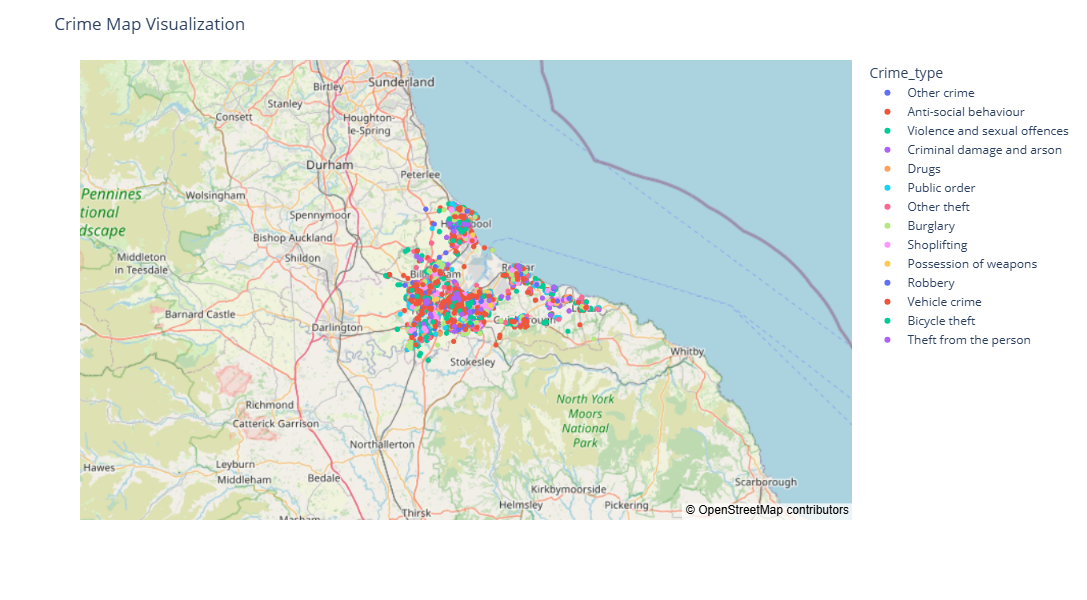

In [58]:
import plotly.express as px
fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    hover_name="Crime_ID",
    hover_data=["Crime_type", "Last_outcome_category", "Location"],
    color="Crime_type",
    zoom=8,
    height=600
)

fig.update_layout(
    mapbox_style="open-street-map", 
    title="Crime Map Visualization"
)

fig.show()

The geospatial analysis reveals a significant concentration of reported crimes within a specific geographic hotspot, likely corresponding to Cleveland's city center. This area exhibits a much higher density of incidents compared to the surrounding suburban or residential areas, where crime reports are more sparse. This pattern suggests that location is a critical factor in crime occurrence.
Within the primary crime hotspot, there is a diverse mix of offenses rather than a single dominant category. 'Violence and sexual offenses,' 'Vehicle crime,' and 'Burglary' are all prevalent within the same high-density areas. This indicates that the city center is a hotspot for a wide range of criminal activities, not just a specific type.
Visually, 'Violence and sexual offences' stands out as one of the most frequently reported crime types across the entire mapped region. This suggests it is a widespread issue, not confined solely to the downtown core. 'Vehicle crime' also shows a strong presence, particularly concentrated within the central hotspot.

<Axes: xlabel='Crime_type'>

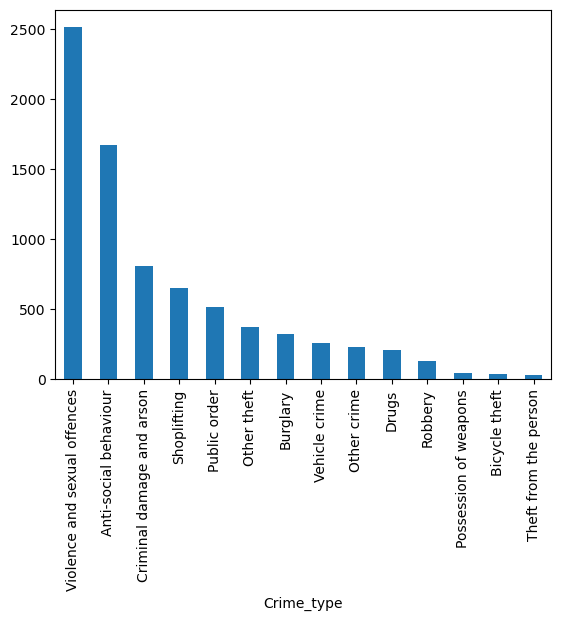

In [42]:
df['Crime_type'].value_counts().plot(kind='bar')

The graph shows a critically imbalanced distribution of crime types, which is a significant challenge for developing a robust predictive model. The dataset is overwhelmingly dominated by high-volume categories: Violence and sexual offences (approximately 2,500 incidents) and Anti-social behaviour (about 1,700 incidents), which together form the majority of the reported crime. To ensure that the model does not simply overfit to these majority classes, it is strategically sound to group the remaining categories. The next tier, comprising Moderate-Frequency Property & Public Order Crimes (including Criminal damage and arson, Shoplifting, Other theft, and Burglary), represents a sizable mid-range cluster that can be effectively modeled for resource allocation focusing on neighborhood patrol and intervention.

To achieve accurate prediction across the spectrum of crime, the lowest-frequency categories—such as Robbery, Possession of weapons, Bicycle theft, and Theft from the person—must be aggregated into a single, specialized category, often termed Rare or Serious Minority Crimes. This is a necessary data engineering step to overcome data sparsity. By consolidating these individually scarce events, the model gains sufficient data points to learn the generalized underlying patterns, thereby improving its predictive sensitivity and operational utility for proactive policing strategies that target these low-volume, high-impact offenses.

<Axes: xlabel='Last_outcome_category'>

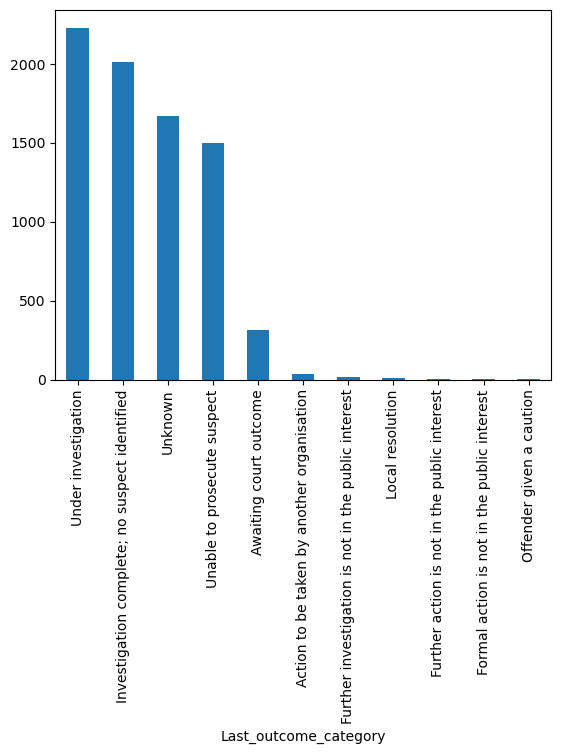

In [43]:
df['Last_outcome_category'].value_counts().plot(kind='bar')

The graph shows a pronounced bottleneck in the criminal justice process, where the majority of reported incidents in the Last Outcome Category are still residing in preliminary or unresolved stages. The active investigative status of cases is massive: "Under investigation" leads with over 2,200 cases, closely followed by "Investigation complete; no suspect identified" at approximately 2,000 cases. This indicates that while the police are logging a high volume of crime, they are struggling to transition these cases into a prosecutorial phase, resulting in a substantial number of cases being closed without an offender identified. Furthermore, the nearly 1,700 cases marked as "Unknown" highlights a critical data integrity issue that requires immediate attention, as these ambiguous records severely limit the utility of the data for accurate predictive modeling and resource planning.

Moving down the hierarchy, the remaining categories underscore a significant lack of final legal resolution. The high volume of cases marked "Unable to prosecute suspect" (about 1,500) suggests persistent challenges with gathering admissible evidence or meeting legal thresholds, even when a suspect may be known. In stark contrast, categories representing definitive judicial outcomes, such as "Awaiting court outcome" (approximately 350) and "Offender given a caution" (negligible count), make up a minimal fraction of the total case load. This distribution is vital for the prediction project, as it dictates that the model’s primary task will be forecasting case progression and resolution status rather than simply predicting the initial occurrence of crime.

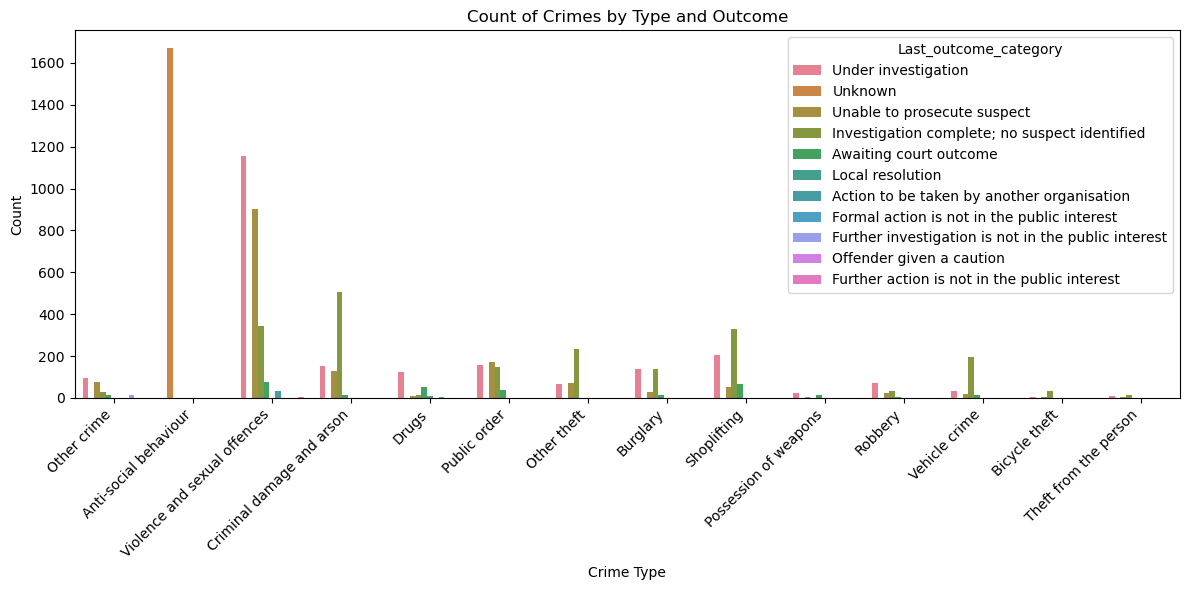

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Crime_type', hue='Last_outcome_category')
plt.xticks(rotation=45, ha='right') 
plt.title('Count of Crimes by Type and Outcome')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.tight_layout() 
plt.show()


The above graph shows that the investigatory outcome of a crime is highly dependent on its type, revealing distinct patterns in how different offenses progress through the justice system. For instance, the most frequent crime, Anti-social behaviour, is overwhelmingly dominated by the “Unknown” outcome category, exceeding 1,600 cases. This is a crucial finding, suggesting that for this high-volume crime, the identity of the perpetrator is rarely established or recorded in the initial report, which logically results in its rapid closure or non-pursuit. In contrast, while Violence and sexual offences also sees a large number of cases under "Under investigation" (approximately 1,100), it also registers a significant proportion of cases where "Investigation complete; no suspect identified" (around 900), pointing to more diligent investigative processes that nonetheless often fail to yield a lead.

Furthermore, analyzing the less common but more serious property crimes reveals a clear difference in investigative focus. Crimes like Burglary, Shopllifting, Robbery, and Vehicle crime all show a greater proportion of cases culminating in "Investigation complete; no suspect identified" (represented by the olive green bar). This implies that a formal, resource-intensive investigative cycle is completed for these offenses before they are closed, demonstrating a structured but ultimately unsuccessful investigative effort. Notably, the relative absence of definitive outcomes such as "Awaiting court outcome" or "Offender given a caution" across all crime types confirms the systemic bottleneck identified in the previous analysis: regardless of the crime type, the police and judicial systems predominantly conclude their involvement at the initial investigative or administrative closure phase.

In [45]:
# One-hot encoded to get multilabel columns
multilabel_df = pd.get_dummies(df['Crime_group'])

# Droped overlapping columns from main dataframe (df)
crime_group_columns = multilabel_df.columns.tolist()
df = df.drop(columns=crime_group_columns, errors='ignore')

# Joined multilabel_df with df
df = df.join(multilabel_df)

print("Multi-label columns (Crime groups):")
print(multilabel_df.columns.tolist())

Multi-label columns (Crime groups):
['Damage & Arson', 'Drug & Substance Crime', 'Other / Miscellaneous', 'Property Crime', 'Public Disorder', 'Violent Crime']


In [46]:
feature_cols = [
    'Latitude', 'Longitude', 'Month', 'Reported_by', 'LSOA_code',
    'Location', 'LSOA_name', 'Last_outcome_category'  
]

X = pd.get_dummies(df[feature_cols])

y = df[['Violent Crime', 'Public Disorder', 'Property Crime', 'Damage & Arson', 'Other / Miscellaneous', 'Drug & Substance Crime']]
print("Feature columns being used for training:")
print(X.columns.tolist())
print("Target columns (crime groups, multi-label):")
print(y.columns.tolist())
print("\nPreview of encoded targets (first 5 rows):")
print(y.head())

Feature columns being used for training:
['Latitude', 'Longitude', 'Month_2025-06', 'Reported_by_Cleveland Police', 'LSOA_code_E01011949', 'LSOA_code_E01011950', 'LSOA_code_E01011951', 'LSOA_code_E01011952', 'LSOA_code_E01011953', 'LSOA_code_E01011954', 'LSOA_code_E01011955', 'LSOA_code_E01011957', 'LSOA_code_E01011959', 'LSOA_code_E01011960', 'LSOA_code_E01011961', 'LSOA_code_E01011962', 'LSOA_code_E01011963', 'LSOA_code_E01011964', 'LSOA_code_E01011965', 'LSOA_code_E01011966', 'LSOA_code_E01011967', 'LSOA_code_E01011968', 'LSOA_code_E01011969', 'LSOA_code_E01011970', 'LSOA_code_E01011971', 'LSOA_code_E01011974', 'LSOA_code_E01011975', 'LSOA_code_E01011977', 'LSOA_code_E01011978', 'LSOA_code_E01011979', 'LSOA_code_E01011980', 'LSOA_code_E01011981', 'LSOA_code_E01011982', 'LSOA_code_E01011983', 'LSOA_code_E01011984', 'LSOA_code_E01011985', 'LSOA_code_E01011986', 'LSOA_code_E01011987', 'LSOA_code_E01011988', 'LSOA_code_E01011989', 'LSOA_code_E01011990', 'LSOA_code_E01011991', 'LSOA_code

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and test split complete.")

Training and test split complete.


In [48]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, verbosity=0)

multi_clf = MultiOutputClassifier(xgb)

multi_clf.fit(X_train, y_train)

print("XGBoost multi-label model trained successfully for all crime categories.")

XGBoost multi-label model trained successfully for all crime categories.


In [59]:
y_pred = multi_clf.predict(X_test)

# Check the output
print("Prediction shape:", y_pred.shape)
print("Example predictions for first 5 samples:\n", y_pred[:5])

Prediction shape: (1562, 6)
Example predictions for first 5 samples:
 [[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [55]:
from sklearn.metrics import classification_report, f1_score, accuracy_score
import numpy as np

y_pred = multi_clf.predict(X_test)

print("Model Evaluation Results:")

accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy Score: {accuracy:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=y.columns))

micro_f1 = f1_score(y_test, y_pred, average='micro')
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Micro F1-score: {micro_f1:.4f}")
print(f"Macro F1-score: {macro_f1:.4f}")


Model Evaluation Results:
Overall Accuracy Score: 0.5384

Detailed Classification Report:
                        precision    recall  f1-score   support

         Violent Crime       0.59      0.69      0.63       518
       Public Disorder       0.99      0.78      0.87       451
        Property Crime       0.63      0.37      0.47       338
        Damage & Arson       0.33      0.08      0.14       153
 Other / Miscellaneous       0.50      0.08      0.13        53
Drug & Substance Crime       1.00      0.12      0.22        49

             micro avg       0.71      0.55      0.62      1562
             macro avg       0.67      0.35      0.41      1562
          weighted avg       0.70      0.55      0.59      1562
           samples avg       0.54      0.55      0.54      1562

Micro F1-score: 0.6169
Macro F1-score: 0.4099


In [56]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score

param_dist = {
    'estimator__max_depth': [3, 6, 9],
    'estimator__learning_rate': [0.05, 0.1, 0.2],
    'estimator__n_estimators': [100, 250],
    'estimator__subsample': [0.8, 1]
}

base_xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, verbosity=0)
multiout_clf = MultiOutputClassifier(base_xgb)

random_search = RandomizedSearchCV(
    multiout_clf, param_distributions=param_dist,
    n_iter=8, scoring='f1_micro', cv=2, n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy Score (tuned): {accuracy:.4f}")

print("\nDetailed Classification Report (tuned):")
print(classification_report(y_test, y_pred, target_names=y.columns))

micro_f1 = f1_score(y_test, y_pred, average='micro')
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Micro F1-score (tuned): {micro_f1:.4f}")
print(f"Macro F1-score (tuned): {macro_f1:.4f}")

print("Best Parameters Found:", random_search.best_params_)


Overall Accuracy Score (tuned): 0.5294

Detailed Classification Report (tuned):
                        precision    recall  f1-score   support

         Violent Crime       0.59      0.78      0.68       518
       Public Disorder       1.00      0.78      0.87       451
        Property Crime       0.71      0.21      0.32       338
        Damage & Arson       0.33      0.01      0.03       153
 Other / Miscellaneous       0.00      0.00      0.00        53
Drug & Substance Crime       0.00      0.00      0.00        49

             micro avg       0.73      0.53      0.61      1562
             macro avg       0.44      0.30      0.32      1562
          weighted avg       0.67      0.53      0.55      1562
           samples avg       0.53      0.53      0.53      1562

Micro F1-score (tuned): 0.6133
Macro F1-score (tuned): 0.3164
Best Parameters Found: {'estimator__subsample': 1, 'estimator__n_estimators': 100, 'estimator__max_depth': 3, 'estimator__learning_rate': 0.1}


In [57]:
lat = 54.5742      # Cleveland latitude
long = -1.2470     # Cleveland longitude

input_data = pd.DataFrame({
    'Latitude': [lat],
    'Longitude': [long],
    'Month': ['2025-07'],  
    'Reported_by': ['Cleveland Police'],  
    'LSOA_code': ['E01012100']           
})

input_data_encoded = pd.get_dummies(input_data)
input_data_encoded = input_data_encoded.reindex(columns=X_train.columns, fill_value=0)

y_pred_prob = multi_clf.predict_proba(input_data_encoded)
probs_matrix = np.stack([p[:, 1] for p in y_pred_prob], axis=1)
threshold = 0.3
y_pred = (probs_matrix > threshold).astype(int)

predicted_crimes = [label for label, val in zip(y_train.columns, y_pred[0]) if val == 1]
print(f"Predicted crimes for location ({lat}, {long}): {predicted_crimes}")


Predicted crimes for location (54.5742, -1.247): ['Violent Crime', 'Drug & Substance Crime']
